### More about overfitting
- the task: y = f(X), given n sample pairs of n * (y, X), we are looking the good 'f'. 
- if we use RF, how many estimators we need to have?

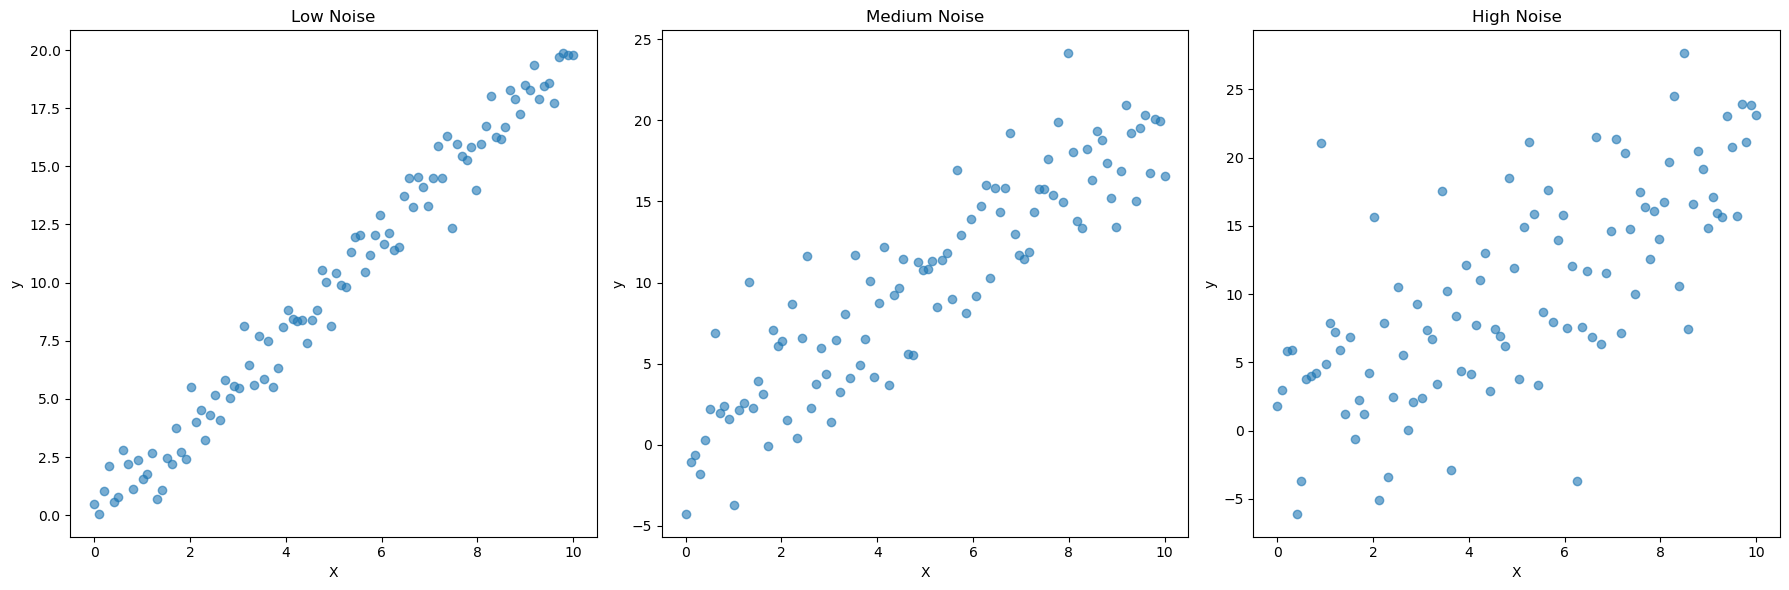

In [7]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Generate X values
X = np.linspace(0, 10, 100)

# Function to generate Y values with noise
def generate_y(X, noise_level):
    noise = np.random.normal(0, noise_level, X.shape)
    y = X * 2 + noise
    return y

# Generate Y values with different levels of noise
y_low_noise = generate_y(X, 1)   # Low noise
y_med_noise = generate_y(X, 3)   # Medium noise
y_high_noise = generate_y(X, 5)  # High noise

# Plotting
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(X, y_low_noise, alpha=0.6)
plt.title('Low Noise')
plt.xlabel('X')
plt.ylabel('y')

plt.subplot(1, 3, 2)
plt.scatter(X, y_med_noise, alpha=0.6)
plt.title('Medium Noise')
plt.xlabel('X')
plt.ylabel('y')

plt.subplot(1, 3, 3)
plt.scatter(X, y_high_noise, alpha=0.6)
plt.title('High Noise')
plt.xlabel('X')
plt.ylabel('y')

plt.tight_layout()
plt.show()


### insights
- ML is an emprical process rather than hard science, inituition is highly important than rigorious reasoning
- samples (obs) should represent the underlying distribtuion. (samples indepently drawn)
- if samples  are really noisey. you would prefer less knobs in the models.
- you have to understand the domain of the datasets.
- try different things, iterate.

### Review Eval metrics
![confusion matrix](confusion-matrix.png)

### imblanced classes

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

(220, 2)

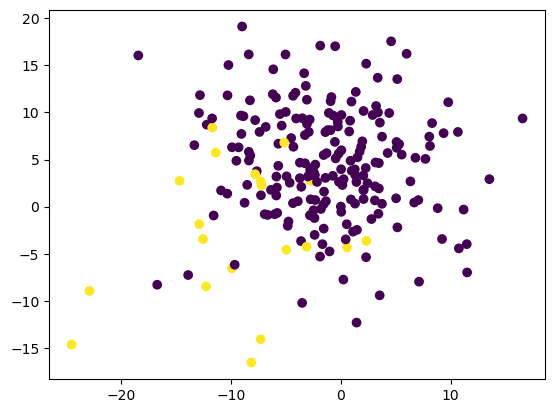

In [10]:
# Generate Test Data
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=[200, 20], random_state=1, cluster_std=6)
plt.scatter(X[:, 0], X[:, 1], c=y)
display(X.shape)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)
# Create a Logistic Regression Model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
# Fit (train) or model using the training data
classifier.fit(X_train, y_train)

LogisticRegression()

In [ ]:
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[50,  0],
       [ 4,  1]])

In [14]:
from sklearn.metrics import classification_report
target_names = ["Class Purple", "Class Yellow"]
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

Class Purple       0.93      1.00      0.96        50
Class Yellow       1.00      0.20      0.33         5

    accuracy                           0.93        55
   macro avg       0.96      0.60      0.65        55
weighted avg       0.93      0.93      0.90        55



### Activity 2
- which classe is more important?
- what is better/worse, fp, fn?

### The Problem
- algo assumes or performs best the when the classes are balanced, otherwise bias towards majority, when minority is our interest
- solutions, oversampling minority/undersampling majority. synthetic data
- concern: Distortion of the original datasets.
- if the difference between purple and yellow is really big, than we can distort the distriubtion. 

### resampling

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

#### Generating the features and targets dataset

#### Random Undersampling
- you might need to update the imblearn lib using
- 'conda update scikit-learn imbalanced-learn'

#### Undersampling explained


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


#### Random Oversampling explained

In [ ]:
from imblearn.over_sampling import RandomOverSampler

### Synthetic Resampling

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

#### Generate an imbalanced data set

In [ ]:
# Generate Data
X, y = make_blobs(n_samples=[5000, 50], random_state=1, cluster_std=7)
X = pd.DataFrame(X)
y = pd.Series(y)

In [ ]:
# Plot data
plt.scatter(
    x=X[0],
    y=X[1],
    c=y)
plt.show()

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
# Count distinct values
y_train.value_counts()

#### Cluster Centroids explained


In [ ]:
from imblearn.under_sampling import ClusterCentroids


#### SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE


#### SMOTEENN


In [ ]:
from imblearn.combine import SMOTEENN


### Balanced Random Forest

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

#### Prepare the data

In [ ]:
# Read dataset
df = pd.read_csv('Resources/credit_data.csv')
df.head()

In [ ]:
# Split target column from dataset
y = df['credit_risk']
X = df.drop(columns='credit_risk')

In [ ]:
# Encode the categorical variables using get_dummies
X = pd.get_dummies(X)

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
# Count distinct values
y_train.value_counts()

In [ ]:
# Scale the data
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
# Print classification report
print(classification_report(y_test, y_pred_rf))

#### BalancedRandomForestClassifier

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier
brf = BalancedRandomForestClassifier()
brf.fit(X_train_scaled, y_train)

In [ ]:
# Predict labels for testing features
y_pred = brf.predict(X_test_scaled)

In [ ]:
# Print classification report
print(classification_report(y_test, y_pred))